**1. Read The Data**

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**2. Explore the dataset**

In [ ]:

df.shape


(20640, 10)

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**3. Preprocess the Data**

*Handle missing values*

---



In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
df.total_bedrooms = df.total_bedrooms.fillna(np.mean(df.total_bedrooms))

In [ ]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

*Encode Categorical Data*

---


In [ ]:
df = pd.get_dummies(df, columns=['ocean_proximity'], dtype='int', drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [ ]:
df.duplicated().sum()

0

**4.Feature Engineering**

In [ ]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

In [ ]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,6.281853,0.172096,2.181467


**5. Removing OutLiers**


In [ ]:
#THE FEATURES WE ARE CONSIDERING FOR OUTLIER REMOVAL

list_of_input_features_for_outliers = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','median_house_value']

<Axes: xlabel='households'>

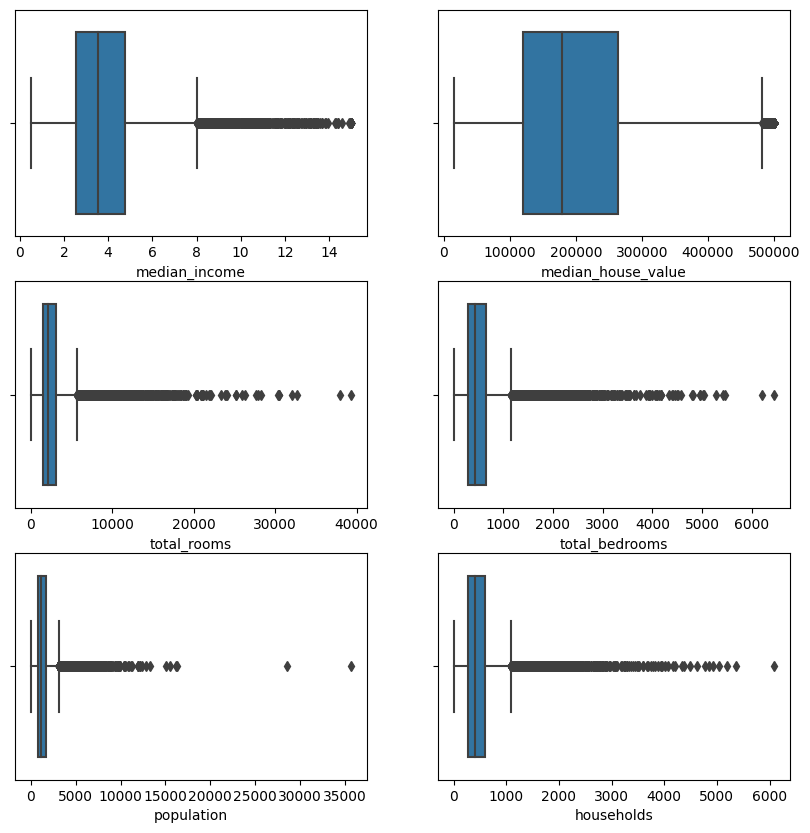

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#VISUALIZING FEATURE DISTRIBUTIONS AND IDENTIFING OUTLIERS USING BOX-PLOTS

fig, axes = plt.subplots(3, 2, figsize = (10, 10))

sns.boxplot(data = df, x = 'median_income', ax = axes[0, 0])
sns.boxplot(data = df, x = 'median_house_value', ax = axes[0, 1])
sns.boxplot(data = df, x = 'total_rooms', ax = axes[1, 0])
sns.boxplot(data = df, x = 'total_bedrooms', ax = axes[1, 1])
sns.boxplot(data = df, x = 'population', ax = axes[2, 0])
sns.boxplot(data = df, x = 'households', ax = axes[2, 1])

*use IQR to remove outliers from features with Skewed distribution.*

In [ ]:
#FUNCTION TO COUNT THE OUTLIERS IN A PARTICULAR FEATURE

def count_outliers_using_IQR(feature_name):
    # IQR
    Q1 = np.percentile(df[feature_name], 25, method = 'midpoint')
    Q3 = np.percentile(df[feature_name], 75, method = 'midpoint')

    IQR = Q3 - Q1

    # Above Upper bound
    upper = df[feature_name] >= (Q3 + 1.5 * IQR)
    # Below Lower bound
    lower = df[feature_name] <= (Q1 - 1.5 * IQR)

    print(feature_name, " : ", len(np.where(upper)[0]) + len(np.where(lower)[0]))

In [ ]:
print("Number of Outlier values with respect to features : \n")

for feature in list_of_input_features_for_outliers:
    count_outliers_using_IQR(feature)

Number of Outlier values with respect to features : 

total_rooms  :  1287
total_bedrooms  :  1305
population  :  1198
households  :  1220
median_income  :  680
median_house_value  :  1071


In [ ]:
#FUNCTION TO CALCULATE THE MASK THAT MARKS WHICH ELEMENTS ARE OUTSIDE THE LIMITS - OUTLIERS

def calc_elements_upper_and_lower_than_IQR(feature_name):
    Q1 = np.percentile(df[feature_name], 25, method = 'midpoint')
    Q3 = np.percentile(df[feature_name], 75, method = 'midpoint')


    IQR = Q3 - Q1

    # Above Upper bound
    upper_element_mask = df[feature_name] >= (Q3 + 1.5 * IQR)
    # Below Lower bound
    lower_element_mask = df[feature_name] <= (Q1 - 1.5 * IQR)

    return upper_element_mask, lower_element_mask

In [ ]:
#LIST CORRESPONDING TO EACH FEATURE
list_of_masks_for_outlier_removal = []

for feature in list_of_input_features_for_outliers:
    x, y = calc_elements_upper_and_lower_than_IQR(feature)
    list_of_masks_for_outlier_removal.append(x)
    list_of_masks_for_outlier_removal.append(y)

#CREATING A MASK FOR OVERALL DATA RECORDS WITH RESPECT TO ALL THE FEATURES

mask_for_outlier_removal_iqr = np.any(list_of_masks_for_outlier_removal, axis = 0)

In [ ]:
# OUTLIER POSITIONS

list_of_records_with_outliers_iqr = np.where(mask_for_outlier_removal_iqr)

In [ ]:
#NUMBER OF TOTAL OUTLIERS

len(list_of_records_with_outliers_iqr[0])

3031

We have 3031 records that are classified as Outliers using IQR Method.

In [ ]:
# CREATING A NEW DATASET WITH OUTLIER VALUES REMOVED USING IQR

dataset_clean_iqr = df.drop(list_of_records_with_outliers_iqr[0])

In [ ]:
dataset_clean_iqr.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0,6.281853,0.172096,2.181467
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,1,0,4.761658,0.231774,2.139896
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,1,0,4.931907,0.192899,2.128405


*use Z-score to remove outliers from Normally distributed features.*

In [ ]:
# IMPORTING LIBRARY NEEDED FOR Z-SCORE CALCULATION AND DEFINING THRESHOLD VALUE

from scipy import stats
threshold = 3

In [ ]:
# DEFINING THE FUNCTION TO CALULATE THE Z-SCORE VLAUE
# Position of the outlier
# where (z > threshold)

def calc_z_score_mask(feature_name):
    z_score = np.abs(stats.zscore(df[feature_name]))
    return z_score > threshold
#CREATING A MASK - MARKING ALL THE ELEMENTS THAT ARE CONSIDERED OUTLIERS i.e. OUT OF LIMITS

#LIST CORRESPONDING TO EACH FEATURE
list_of_masks_for_outlier_removal_z = []

for feature in list_of_input_features_for_outliers:
    feature_mask = calc_z_score_mask(feature)
    list_of_masks_for_outlier_removal_z.append(feature_mask)

#CREATING A MASK FOR OVERALL DATA RECORDS WITH RESPECT TO ALL THE FEATURES

mask_for_outlier_removal_z = np.any(list_of_masks_for_outlier_removal_z, axis = 0)

In [ ]:
# OUTLIER POSITIONS

list_of_records_with_outliers_z = np.where(mask_for_outlier_removal_z)
#NUMBER OF TOTAL OUTLIERS

len(list_of_records_with_outliers_z[0])

894

In [ ]:
# CREATING A NEW DATASET WITH OUTLIER VALUES REMOVED USING Z-SCORE

dataset_clean_z = df.drop(list_of_records_with_outliers_z[0])

In [ ]:
dataset_clean_z.shape

(19746, 16)

In [ ]:
df = dataset_clean_iqr

In [ ]:
y_target = df['median_house_value']
X_features = df.drop(['median_house_value'], axis = 1)

*Target feature Normalization*

In [ ]:
#IMPORTING LIBRARIES TO PERFORM NORMALIZATION

from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm

<ipython-input-31-5bb30d458e09>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_target, kde = True, hist = True, fit = norm, ax = ax[1])


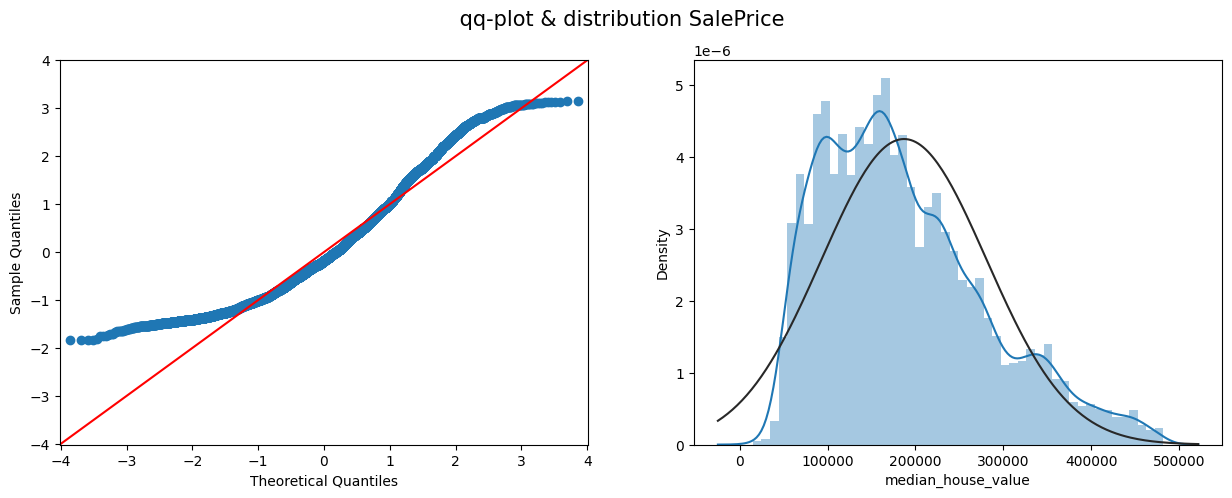

In [ ]:
# MedHouseVal BEFORE TRANSFORMATION

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(y_target, stats.t, distargs=(4,), fit = True, line = "45", ax = ax[0])

sns.distplot(y_target, kde = True, hist = True, fit = norm, ax = ax[1])

plt.show()

In [ ]:
y_target_log = np.log1p(y_target)

<ipython-input-33-e24f552d3971>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_target_log, kde = True, hist = True, fit = norm, ax = ax[1])


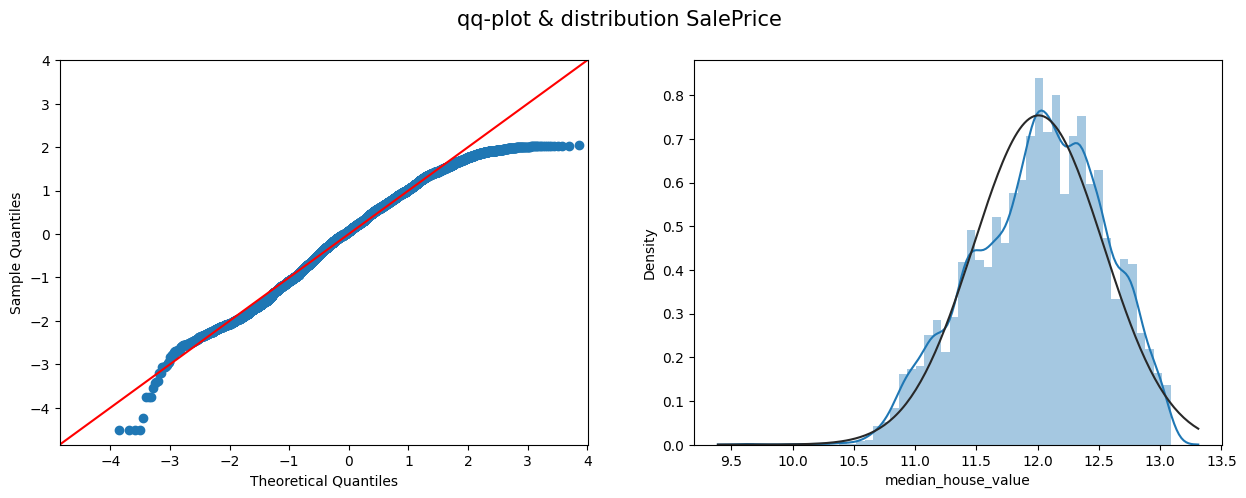

In [ ]:
# MedHouseVal after transformation


fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(y_target_log, stats.t, distargs=(4,), fit = True, line = "45", ax = ax[0])
sns.distplot(y_target_log, kde = True, hist = True, fit = norm, ax = ax[1])
plt.show()

**6. The relationships between the variables and the targets.**

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation of each variable with the target variable 'median_house_value'
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)
correlation_with_target

median_house_value            1.000000
median_income                 0.629247
total_rooms                   0.192084
ocean_proximity_NEAR BAY      0.159798
ocean_proximity_NEAR OCEAN    0.139639
households                    0.120424
housing_median_age            0.097741
total_bedrooms                0.091364
rooms_per_household           0.088809
ocean_proximity_ISLAND        0.034757
population                   -0.011466
longitude                    -0.043532
latitude                     -0.157176
bedrooms_per_room            -0.177113
population_per_household     -0.188148
ocean_proximity_INLAND       -0.510560
Name: median_house_value, dtype: float64

<Axes: >

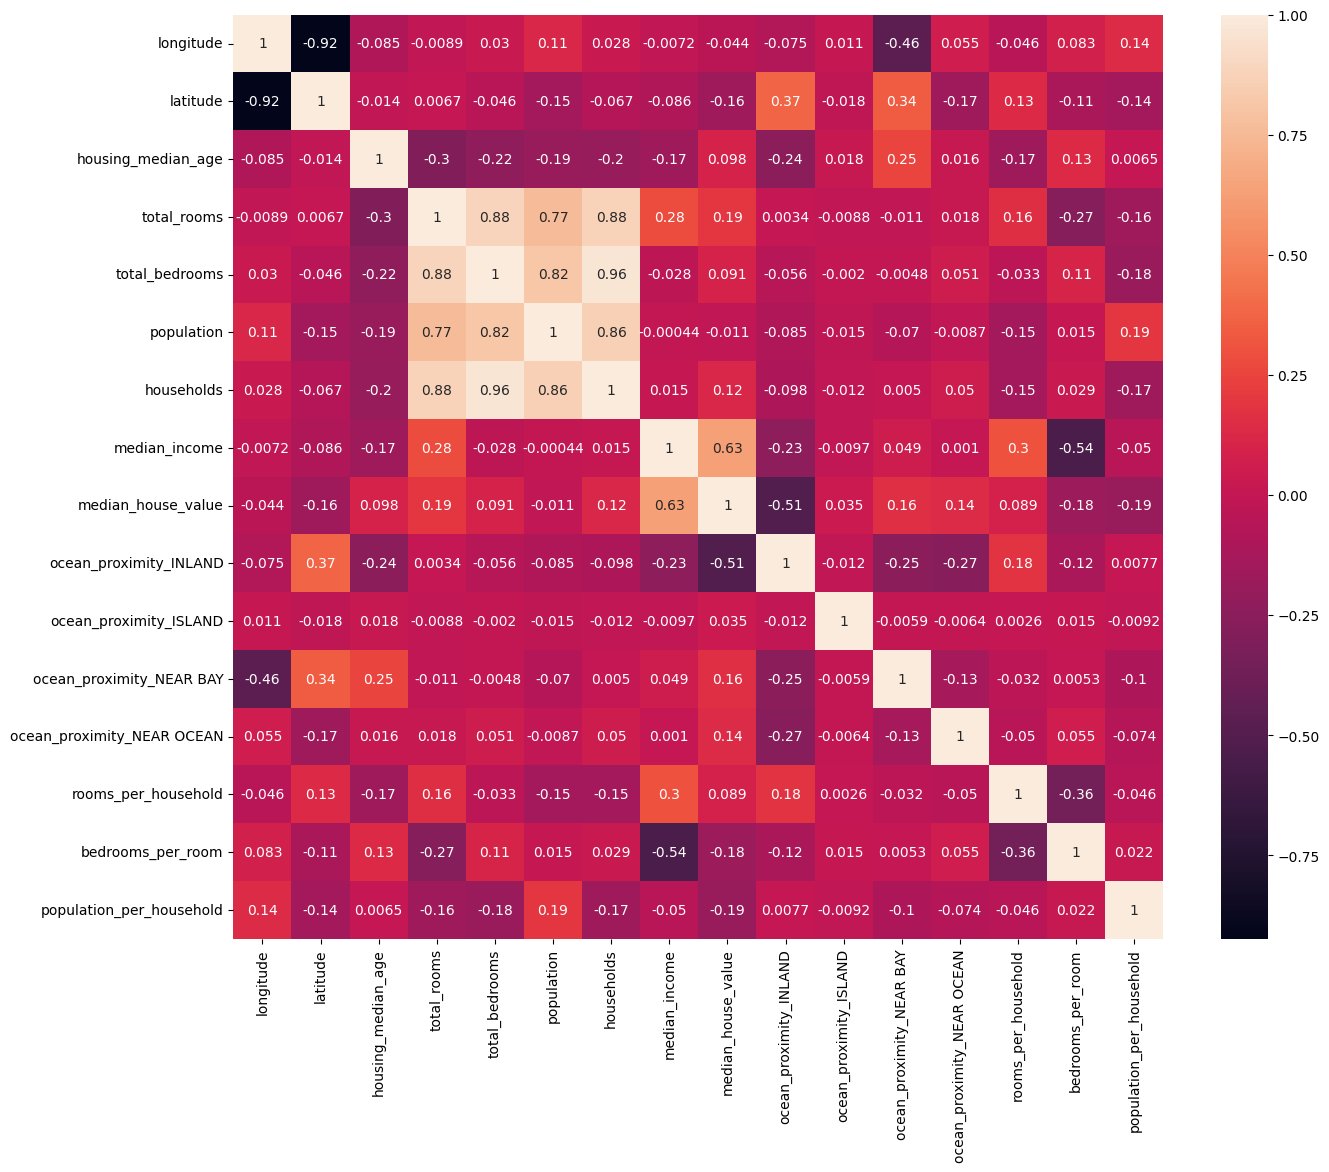

In [ ]:
# Visualize the correlation of each variable with the target variable 'median_house_value'
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)

**7. Splitting Dataset into train and test sets**

In [ ]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.2, random_state = 42)

In [ ]:
#STANDARDIZE THE DATASET

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#SCALING THE TRAIN DATA - FIT AND TRANSFORM

X_train = scaler.fit_transform(X_train)

#TRANSFORM (SCALE) TEST DATA USING SAME SCALER FITTED USED TRAIN SET

X_test = scaler.transform(X_test)


In [ ]:
#FUNCTION TO CALCULATE THE EVALUATION SCORE USING CROSS VALIDATION AND R SQAURE SCORING
from sklearn.model_selection import cross_val_score

def calculate_eval_metric(model, X, y, cv = 3):
    scores = cross_val_score(model, X, y, cv = cv, scoring = 'r2')
    print("Evaluation score on 3 cross-validation sets : ", scores)
    print("Average R squared score : ", scores.mean())
    return scores.mean()

In [ ]:
#DICTIONARY TO STORE CV SCORES
cv_scores = {}

**7. Modeling.**

**Linear** **Regression**

In [ ]:
#IMPORTING LINEAR REGRESSOR IMPLEMENTATION FROM SKLEARN

from sklearn.linear_model import LinearRegression

In [ ]:
#CREATING A MODEL OBJECT AND TRAINING

linear_regression_model = LinearRegression()

cv_scores['linear_regression_model'] = calculate_eval_metric(linear_regression_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.6145668  0.62858995 0.62634702]
Average R squared score :  0.623167920605577


*Loss Curve For Linear Regression*


Mean Squared Error on Test Data: 3468929473.0642147


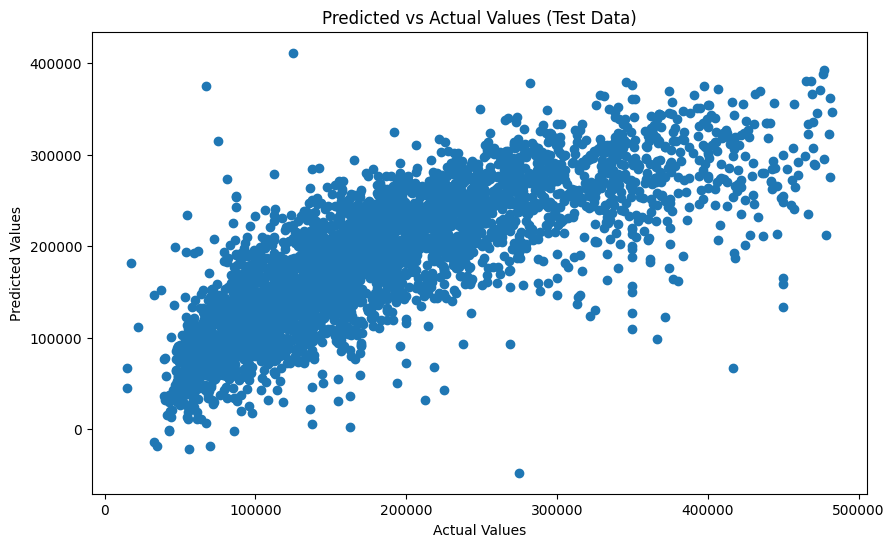

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse


# Create a Linear Regression model
linear_regression_model = LinearRegression()

# Train the model on the scaled training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = linear_regression_model.predict(X_test)

# Calculate MSE on the test data
mse_test = mse(y_test, y_pred_test)

# Print the MSE on the test data
print("Mean Squared Error on Test Data:", mse_test)

# Plot the predicted vs actual values on the test data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values (Test Data)")
plt.show()


 **KNN**

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=18).fit(X_train, y_train)
cv_scores['Knn'] = calculate_eval_metric(knn, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.67168832 0.68923142 0.68611015]
Average R squared score :  0.6823432959082879


*Loss Curve For KNN*

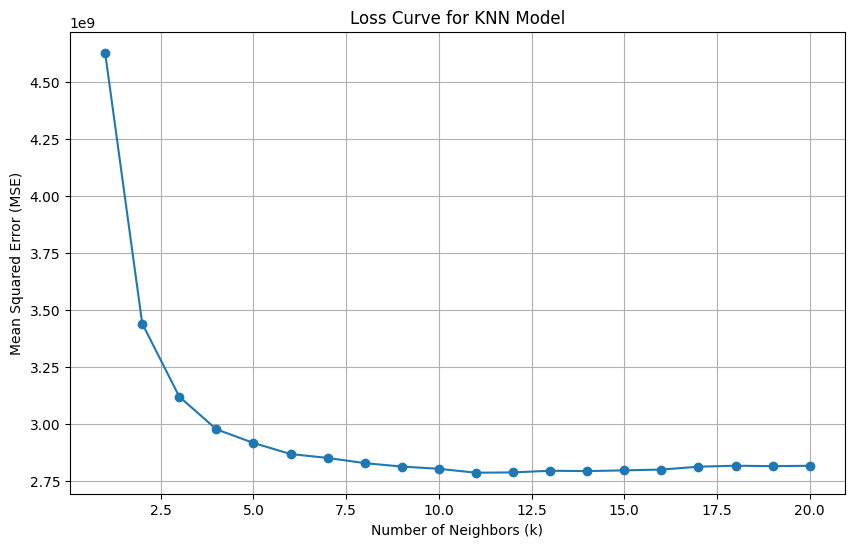

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate mean squared error for a given k
def calculate_mse_for_k(k, X_train, X_test, y_train, y_test):
    knn_model = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    mse_value = mse(y_test, y_pred)
    return mse_value

# Range of values for k
k_values = range(1, 21)  # You can adjust this range based on your needs

# Calculate MSE for each value of k
mse_values = [calculate_mse_for_k(k, X_train, X_test, y_train, y_test) for k in k_values]

# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('Loss Curve for KNN Model')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boosting_model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, learning_rate = 0.1, max_depth = 8)

cv_scores["gradient_boosting_model"] = calculate_eval_metric(gradient_boosting_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.78743338 0.80353852 0.80631629]
Average R squared score :  0.7990960650730976


*Loss Curve For Gradient Boosting Regressor.*

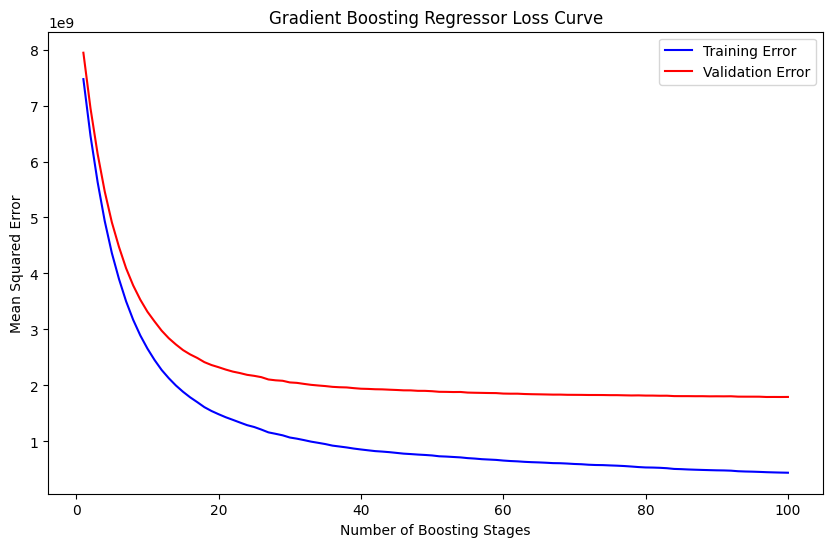

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fit the Gradient Boosting Regressor to the training data
gradient_boosting_model.fit(X_train, y_train)

# Initialize lists to store training and validation errors at each stage
train_errors = []
validation_errors = []

# Get predictions at each stage for training and validation sets
for y_pred_train, y_pred_val in zip(gradient_boosting_model.staged_predict(X_train), gradient_boosting_model.staged_predict(X_test)):
    train_errors.append(mse(y_train, y_pred_train))
    validation_errors.append(mse(y_test, y_pred_val))

# Plot the training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, gradient_boosting_model.n_estimators + 1), train_errors, label='Training Error', color='blue')
plt.plot(np.arange(1, gradient_boosting_model.n_estimators + 1), validation_errors, label='Validation Error', color='red')
plt.xlabel('Number of Boosting Stages')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Boosting Regressor Loss Curve')
plt.legend()
plt.show()



**eXtreme Gradient Boosting Regressor (XGBoost)**

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(max_depth = 8, n_estimators = 100, random_state = 42)

cv_scores["xgb_model"] = calculate_eval_metric(xgb_model, X_train, y_train)

Evaluation score on 3 cross-validation sets :  [0.78188369 0.79387968 0.79605141]
Average R squared score :  0.7906049245321869


*Loss Curve For XGBoost Model.*

[0]	train-rmse:73900.16383	test-rmse:77125.65372
[1]	train-rmse:61183.89780	test-rmse:65311.97232
[2]	train-rmse:52644.89385	test-rmse:57626.13007
[3]	train-rmse:47105.86436	test-rmse:53180.60309
[4]	train-rmse:43077.19809	test-rmse:50271.57713
[5]	train-rmse:40382.94172	test-rmse:48556.44247
[6]	train-rmse:38129.60090	test-rmse:47544.62307


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [09:50:17] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:36707.44771	test-rmse:46989.31082
[8]	train-rmse:35439.72511	test-rmse:46308.33752
[9]	train-rmse:33953.98255	test-rmse:45750.33541
[10]	train-rmse:33063.71023	test-rmse:45486.62492
[11]	train-rmse:32319.76885	test-rmse:45178.24713
[12]	train-rmse:31444.50794	test-rmse:44879.89592
[13]	train-rmse:30885.78058	test-rmse:44661.07455
[14]	train-rmse:30335.83284	test-rmse:44422.14576
[15]	train-rmse:29497.01607	test-rmse:44081.59545
[16]	train-rmse:28747.44331	test-rmse:43896.29823
[17]	train-rmse:28284.43720	test-rmse:43901.66722
[18]	train-rmse:27689.01688	test-rmse:43688.86054
[19]	train-rmse:27399.74687	test-rmse:43638.49686
[20]	train-rmse:26943.46444	test-rmse:43506.77320
[21]	train-rmse:26441.28802	test-rmse:43504.11786
[22]	train-rmse:26065.27835	test-rmse:43300.60301
[23]	train-rmse:25505.98235	test-rmse:43300.64495
[24]	train-rmse:24990.80449	test-rmse:43182.85966
[25]	train-rmse:24758.17549	test-rmse:43186.33913
[26]	train-rmse:24427.86201	test-rmse:43245.71183
[27

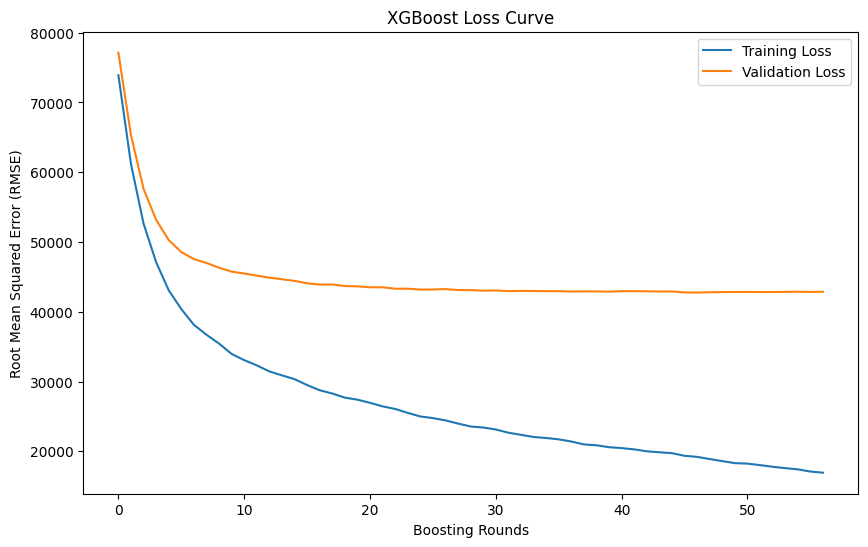

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt


# Convert the data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for XGBoost
params = {
    'max_depth': 8,
    'n_estimators': 100,
    'random_state': 42,
    'objective': 'reg:squarederror',  # Specify the regression objective
}

# Train the XGBoost model and retrieve the evaluation history
evals_result = {}
xgb_model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dtest, 'test')],
                      early_stopping_rounds=10, verbose_eval=True, evals_result=evals_result)

# Extract the training and validation loss from the evaluation history
train_loss = evals_result['train']['rmse']
test_loss = evals_result['test']['rmse']

# Plot the training and validation loss over boosting rounds
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Validation Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('XGBoost Loss Curve')
plt.legend()
plt.show()


In [ ]:
cv_scores

{'linear_regression_model': 0.623167920605577,
 'Knn': 0.6823432959082879,
 'gradient_boosting_model': 0.7990960650730976,
 'xgb_model': 0.7906049245321869}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#BOOSTING MODEL
gradient_boosting_model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, learning_rate = 0.1, max_depth = 8)

#FIT THE MODEL USING THE COMPLETE TRAINING DATA FOR BETTER PERFORMANCE
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, random_state=0)

In [ ]:
#EVALUATION SCORE (R SQUARED) ON TRAIN DATA - HOW WELL OUR MODEL PERFORMS ON TRAINING DATA
gradient_boosting_model.score(X_train, y_train)

0.9493409860225814

In [ ]:
#EVALUATION SCORE ON TEST DATA TO SEE HOW WELL OUR MODEL GENERALIZE TO NEW DATA
gradient_boosting_model.score(X_test, y_test)

0.8038737851748001


**8. Learn Feature Importance and Relations**

Feature ranking:
1. Feature 'median_income': 0.39696726057544657
2. Feature 'ocean_proximity_INLAND': 0.18167193330345607
3. Feature 'population_per_household': 0.11191059673770067
4. Feature 'longitude': 0.09936631219294036
5. Feature 'latitude': 0.08874361920047602
6. Feature 'housing_median_age': 0.03702613878023083
7. Feature 'rooms_per_household': 0.023218679801474202
8. Feature 'bedrooms_per_room': 0.02128633105502259
9. Feature 'total_bedrooms': 0.010078135169303124
10. Feature 'total_rooms': 0.00981622581885177
11. Feature 'population': 0.009130915358303883
12. Feature 'households': 0.00679086159716118
13. Feature 'ocean_proximity_NEAR OCEAN': 0.0028277110113113634
14. Feature 'ocean_proximity_NEAR BAY': 0.0008275503723948683
15. Feature 'ocean_proximity_ISLAND': 0.0003377290259264067


Text(0.5, 0, 'Feature Name')

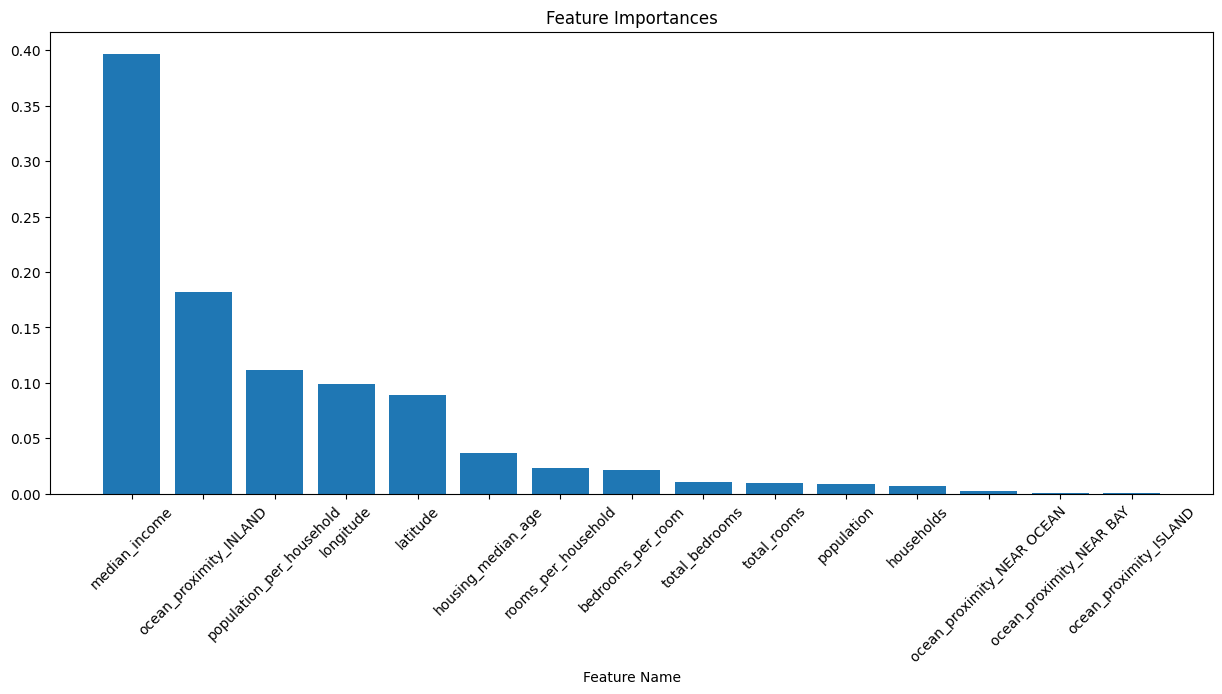

In [ ]:
# Retrieve feature importances
feature_importances = gradient_boosting_model.feature_importances_

# Get the column names from the original DataFrame
feature_names = X_features.columns

# Sort the features by their importance scores
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking with names
print("Feature ranking:")
for f in range(X_features.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}': {feature_importances[indices[f]]}")

# You can also plot the feature importances with names
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.bar(range(X_features.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_features.shape[1]), feature_names[indices], rotation=45)
plt.xlabel("Feature Name")